## importing libraries

In [120]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [121]:
mnist=keras.datasets.fashion_mnist

In [122]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

## data exploration

- category mapping

<table>
<thead>
<tr>
<th>Label</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td>0</td>
<td>T-shirt/top</td>
</tr>
<tr>
<td>1</td>
<td>Trouser</td>
</tr>
<tr>
<td>2</td>
<td>Pullover</td>
</tr>
<tr>
<td>3</td>
<td>Dress</td>
</tr>
<tr>
<td>4</td>
<td>Coat</td>
</tr>
<tr>
<td>5</td>
<td>Sandal</td>
</tr>
<tr>
<td>6</td>
<td>Shirt</td>
</tr>
<tr>
<td>7</td>
<td>Sneaker</td>
</tr>
<tr>
<td>8</td>
<td>Bag</td>
</tr>
<tr>
<td>9</td>
<td>Ankle boot</td>
</tr>
</tbody>
</table>

In [123]:
labels={0:'top',1:'trouser',2:'pullover',3:'dress',4:'coat',5:'sandal',6:'shirt',7:'sneaker',8:'bag',9:'ankle boot'}

- training data shape

In [124]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

- test data shape

In [125]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

### plotting image

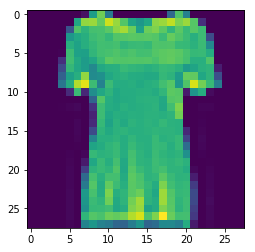

In [126]:
plt.imshow(x_train[10])
plt.show()

###  normalising training and test set

In [127]:
x_train=x_train/256
x_test=x_test/256

## Building model using tensorflow

In [128]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [129]:
model=Sequential()

In [130]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))        

In [131]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Model compilation
  - optimiser
  - loss
  - metrics

In [132]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])

- training

In [133]:
model.fit(x_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.5068 - accuracy: 0.8206
Epoch 2/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3783 - accuracy: 0.8630
Epoch 3/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3475 - accuracy: 0.8760
Epoch 4/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3325 - accuracy: 0.8830
Epoch 5/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3169 - accuracy: 0.8880
Epoch 6/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3092 - accuracy: 0.8934
Epoch 7/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3003 - accuracy: 0.8961
Epoch 8/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2946 - accuracy: 0.8994
Epoch 9/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2875 - accuracy: 0.9021
Epoch 10/10
60

### accuracy

In [134]:
test_losst,acc=model.evaluate(x_test,y_test,verbose=0)

In [135]:
print(acc)

0.8778


## predicting image

In [136]:
x=np.array([x_test[4]])

- actual image

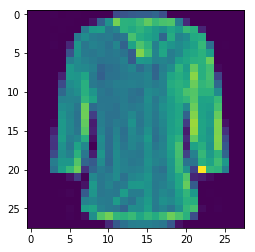

In [137]:
plt.imshow(x_test[4])
plt.show()

- prediction

In [138]:
pred=np.squeeze(model.predict_classes(x))
print(labels[int(pred)])

shirt
